In [2]:
import pandas as pd
import statistics

In [3]:
data = pd.read_csv('data\wine_cleared.zip', index_col=0)

In [4]:
data

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Вычислите наименьший балл за вино в датасете

In [5]:
data.describe()

,points,price
count,129971.000000,129971.000000
mean,88.447138,35.363389
std,3.039730,39.577066
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


In [6]:
data['points'].min()

80

Вычислите наименьшую цену за бутылку в наборе данных

In [7]:
data['price'].min()

4.0

Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [8]:
round(statistics.mean(data['price']), 2)

35.36

In [9]:
data['price'].mean()

35.363389129985535

Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [10]:
statistics.median(data['price'])

28.0

In [11]:
data['price'].median()

28.0

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [12]:
round(statistics.mode(data['price']), 2)

35.36

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.

In [13]:
round(data['price'].value_counts().index[0], 2)

35.36

In [14]:
data['price'].mode()

0    35.363389
Name: price, dtype: float64

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [15]:
data[['price', 'points']].corr()

,price,points
price,1.000000,0.402137
points,0.402137,1.000000


In [16]:
round(data[['price', 'points']].corr().loc['price', 'points'], 6)

0.402137

Проверка нормальности распределения

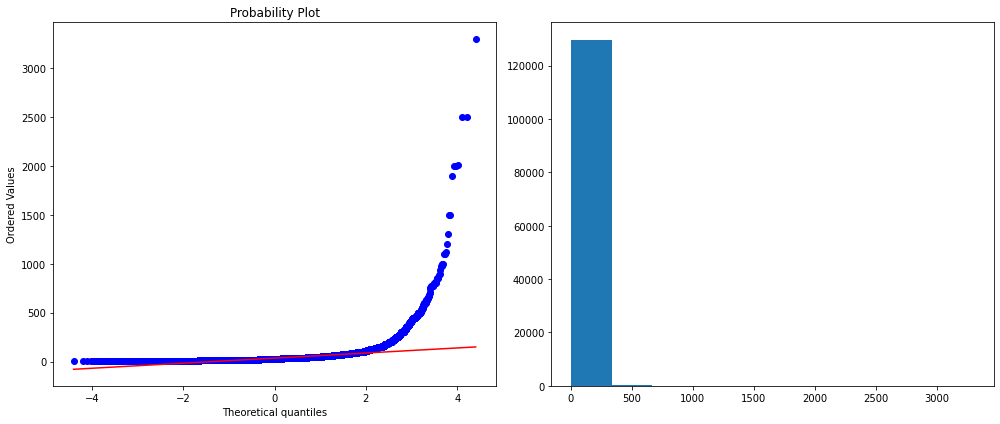

In [20]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Цена точно не распределена нормально. В первом графике она уходит от прямой линии по параболе. На гистограмме распределения колокол вообще не виден.

Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение

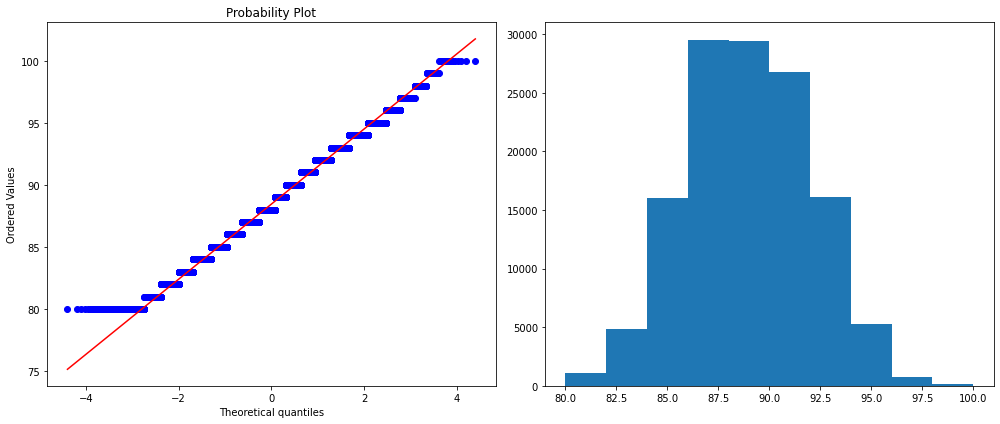

In [22]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

А вот баллы за вино отвечают нормальному распределению

Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

In [23]:
data.corr(method='spearman')

,points,price
points,1.000000,0.581095
price,0.581095,1.000000


In [25]:
round(data.corr(method='spearman').loc['points', 'price'], 2)

0.58

Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [26]:
data.corr(method='kendall')

,points,price
points,1.000000,0.433498
price,0.433498,1.000000


In [27]:
round(data.corr(method='kendall').loc['points', 'price'], 2)

0.43

In [28]:
from sklearn.metrics import matthews_corrcoef

В нашем датасете винных обзоров нет бинарных переменных, но мы можем воспользоваться учебным примером.

Пример. Создадим два случайных признака x, y и зададим им бинарные значения.

In [36]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [37]:
round(matthews_corrcoef(x, y), 2)

-0.33